<a href="https://colab.research.google.com/github/Nabakindagrace/gracenabakinda_codes/blob/main/Nabakinda_Grace_Predictive_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
## mounting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##importing the dataset into the notebook
data=pd.read_csv('/content/drive/MyDrive/churn-bigml-80.csv')
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


# **About the dataset.**

The dataset contains telecom customer data, originally used to predict whether a customer will churn (leave the company) or stay.

**Typical Columns Include**

1. State- 	Customer’s state (geographic location)

2. Account Length	- Duration of customer’s account in days

3. Area Code	- Regional code of the customer.

4. International Plan	- Whether the customer has an international calling plan (Yes/No)

5. Voice Mail Plan - 	Whether the customer has a voicemail plan (Yes/No)

6. Number vmail messages	- Count of voicemail messages

7. Total day minutes / Total eve minutes / Total night minutes	- Total call duration during different times of day

8. Total day charge / Total eve charge / Total night charge	- Corresponding call charges

9. Customer service calls	-Number of times the customer called customer service

10. Churn	- whether the customer left (True) or stayed (False)




# **Goal.**

The goal is to build and evaluate a classification model
 to predict whether a customer will churn (leave the company) or stay

In [ ]:
#Checking Data Types
data.dtypes

,0
State,object
Account length,int64
Area code,int64
International plan,object
Voice mail plan,object
Number vmail messages,int64
Total day minutes,float64
Total day calls,int64
Total day charge,float64
Total eve minutes,float64


In [ ]:
# Checking for duplicates
print(data.duplicated().sum())

0


In [ ]:
##checking for missing values
data.isnull().sum()

,0
State,0
Account length,0
Area code,0
International plan,0
Voice mail plan,0
Number vmail messages,0
Total day minutes,0
Total day calls,0
Total day charge,0
Total eve minutes,0


In [ ]:
##Tagets and features
y=data['Churn']
x=data.drop('Churn',axis=1)

In [ ]:
##class imbalance
data['Churn'].value_counts()

,count
Churn,
False,2278
True,388


In [ ]:
#####changing the Churn colum into binary column,where 1 represents yes and 0 represents no
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])

In [ ]:
data

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,0
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,0
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,0
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,0


In [ ]:
##splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2132, 19)
(534, 19)
(2132,)
(534,)


In [ ]:
print(round(len(y_train) / len(data) * 100, 1))
print(round(len(y_test) / len(data) * 100, 1))

80.0
20.0


In [ ]:
num_cols=x_train.select_dtypes('number').columns
num_cols

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

**Saving list of categorical features to one-hot-encode**

In [ ]:
categorical_cols = ['State', 'International plan', 'Voice mail plan', ]
ohe_cols = categorical_cols
ohe_cols

['State', 'International plan', 'Voice mail plan']

In [ ]:
# Instantiate one hot encoder
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [ ]:
# Fitting the OneHotEncoder on the training data
ohe_encoder.fit(x_train[ohe_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
## Transformming the training and testing data
x_train_ohe = ohe_encoder.transform(x_train[ohe_cols])
x_test_ohe = ohe_encoder.transform(x_test[ohe_cols])

In [ ]:
x_train_ohe

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
1855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1095,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
x_test_ohe

,State_AK,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_No,International plan_Yes,Voice mail plan_No,Voice mail plan_Yes
2087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
479,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
958,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
861,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
# Concatenating  numeric features and one-hot encoded categorical features for the entire dataset
x_train_processed = pd.concat([x_train[num_cols], x_train_ohe], axis=1)
y_train_processed = y_train


# **DATA MODELLING**

# **1. Decision Trees**

**A Decision Tree** is a type of supervised machine learning algorithm used for both classification and regression tasks. It models decisions by splitting the data into subsets based on features, forming a tree-like structure of decisions and their possible consequences.

**How a Decision Tree Works**

A Decision Tree works by recursively partitioning the data space into regions that contain increasingly homogeneous data points with respect to the target variable. It follows a structure composed of three parts:

1. Root Node: Represents the entire dataset, which is then split into two or more homogeneous sets.

2. Internal/Decision Nodes: Represent a feature test or condition (e.g., "Is the customer on an International Plan?"). The branch coming from this node represents the outcome of the test.

3. Leaf/Terminal Nodes: Represent the final decision or outcome (e.g., "Customer will Churn)


The core of the Decision Tree is selecting the best feature and best threshold to perform a split at each node. This selection is based on a metric that measures the impurity or disorder of the data in the child nodes. The goal is to maximize the reduction of impurity after a split. This process of selecting the best split and partitioning the data continues recursively until a stop condition is met.

**Pros and Cons of Decision Trees**

Decision Trees are popular due to their simplicity and interpretability, but they have key limitations, particularly with complex or noisy data.

**Advantages (Pros)**

•	Decision Trees are often called "white box" models. The logic behind the prediction is easy to follow and explain (you can literally visualize the path of the decision).

•	DTs are not sensitive to the scaling of numerical features (unlike models like Logistic Regression or SVM) because they use condition checks (e.g., X>100) rather than distance calculations.

•	They can handle both numerical and categorical features without complex preprocessing steps (like one-hot encoding for the whole dataset).

•	DTs naturally capture complex, non-linear relationships and interactions between features.

**Disadvantages (Cons)**

. Unconstrained DTs can grow too deep and memorize the noise in the training data, leading to perfect training accuracy but very poor performance on unseen test data. This is their biggest drawback.

•	A small change in the data (e.g., adding or removing a few data points) can result in a completely different optimal split, leading to a drastically different tree structure.

•	The algorithm makes locally optimal greedy decisions at each split (maximizing impurity reduction at that moment). This doesn't guarantee that the resulting tree is the globally optimal decision structure.

•	Bias In highly imbalanced classification problems (like customer churn), the tree can be biased toward the majority class, although this can be mitigated using parameters like class_weight='balanced'


In [ ]:
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(x_train_processed, y_train_processed)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
##building and fitting the pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
default_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state =42))
])
default_tree.fit(x_train_processed, y_train_processed)

Pipeline(steps=[('scaler', StandardScaler()),
                ('dt', DecisionTreeClassifier(random_state=42))])

In [ ]:
x_test_processed = pd.concat([x_test[num_cols], x_test_ohe], axis=1)
test_preds = dt.predict(x_test_processed)

In [ ]:
#evaluating the model

print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

       False       0.95      0.96      0.96       455
        True       0.78      0.72      0.75        79

    accuracy                           0.93       534
   macro avg       0.87      0.84      0.85       534
weighted avg       0.93      0.93      0.93       534



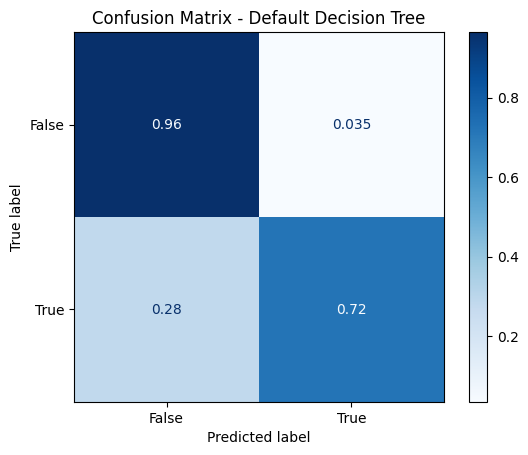

In [ ]:
##confusionmatrix
test_preds = dt.predict(x_test_processed)
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')

plt.title("Confusion Matrix - Default Decision Tree")
plt.show()

**Overall Model Performance .**
The model achieved an overall accuracy of 93%. This means that the  model correctly classified the outcome (either Churn or No Churn) for 93% of the total customers in the test set (534 customers).

**Detailed Interpretation of Key Metrics:**

**Precision:**

For Class 0.0 (No Churn): 0.95. This means that when the model predicts a customer will not churn, it is correct 95% of the time.

For Class 1.0 (Churn): 0.78. This means that when the model predicts a customer will churn, it is correct 78% of the time. This is a strong precision score for the minority class, indicating that when the company invests resources to save a flagged customer, that investment is likely justified.

**Recall:**

For Class 0.0 (No Churn): 0.96. This means the model correctly identifies 96% of all customers who will not churn.

For Class 1.0 (Churn): 0.72. This means the model correctly identifies 72% of all customers who actually churn. This is a good recall score, meaning the model catches the majority of the customers the company needs to save.

**Confusion Matrix Interpretation**

True Negative (Top-Left):. This means 96% of individuals who do not churn were correctly predicted as not churning.

False Positive (Top-Right):. This means a small number of customers (4% of the Non-Churn group) who do not churn were incorrectly flagged as high-risk (Type I error).

False Negative (Bottom-Left):. This means 28% of individuals who actually churned were incorrectly predicted as low-risk (Type II error). This represents the potential missed opportunities for intervention.

True Positive (Bottom-Right): This means 72% of individuals who actually churned were correctly identified, aligning with the recall score for the True class.

**Key Strengths and Weaknesses**

**Key Strengths:**

High Precision for Churn (0.78): When the model flags a customer for intervention, there is a high likelihood (78%) that the customer was a genuine churn risk. This makes the intervention resources highly efficient.

Good Recall for Churn (0.72): The model is effective at identifying the majority of the individuals who actually churn, making it a reliable screening tool to minimize the most damaging errors (missed churners).

**Key Weaknesses:**

False Negatives ( 28% of Churners): While good, the recall of 0.71 means the model still fails to identify nearly 4 out of every 10 customers who end up leaving the company. If the cost of a missed churner is extremely high, this metric may need further improvement (e.g., through more advanced balancing techniques).

**In Summary:** The model is a highly efficient predictor of churn. It successfully identifies most churners while maintaining strong confidence in its positive predictions. It is an effective tool for targeting retention efforts where the primary goals are to ensure that outreach efforts are focused on actual high-risk customers (high precision) and to minimize the number of lost customers (good recall).


# **TUNING THE MODEL**

## **About GridSearchCV**.

**GridSearchCV** is a technique in machine learning model optimization used to find the best combination of hyperparameters for a given model. It automates the process of trying out different parameter values and evaluates model performance using cross-validation.

It;

•	First defines a set of hyperparameters you want to test (e.g., max_depth, min_samples_split for a decision tree).

•	Create a grid (cartesian product) of all combinations of these hyperparameters.

•	For each combination:

•	Train the model using cross-validation

•	Compute a performance score (like recall_macro, accuracy, etc.) for each fold.

•	Take the average score across folds.

•	And lastly select the best combination of hyperparameters based on the highest
•	average score.


**Recall** measures the ability of the model to correctly identify positive instances.


**Recall_macro** computes the recall for each class separately, then takes the average without considering class imbalance.It's useful when:

•	You have imbalanced classes, it ensures balanced sensitivity across both classes

•	You want to treat each class equally, not weighted by frequency

In [ ]:
from sklearn.model_selection import GridSearchCV

#  GridSearchCV: tries all combinations of given hyperparameters.
# It cross-validates each combo to find the best. Here we focus on 'recall_macro'.

# Param grid
param_grid = {
    'dt__max_depth': [2, 4, 6, 8, 10, None],
    'dt__min_samples_split': [2, 5, 10],
    'dt__min_samples_leaf': [1, 2, 4],
     'dt__class_weight': [None, 'balanced']}

# Instantiate GridSearchCV
grid_search = GridSearchCV(default_tree, param_grid, cv=5,  scoring='recall_macro',
    n_jobs=-1) # Changed scoring to recall to prioritize identifying Charged Off loans

# Fit GridSearchCV to the training data
grid_search.fit(x_train_processed, y_train_processed)

# Get the best model from the grid search
best_dt = grid_search.best_estimator_

print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'dt__class_weight': 'balanced', 'dt__max_depth': 6, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}


In [ ]:
##testing the model
test_preds = best_dt.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

       False       0.96      0.95      0.96       455
        True       0.73      0.80      0.76        79

    accuracy                           0.93       534
   macro avg       0.85      0.87      0.86       534
weighted avg       0.93      0.93      0.93       534



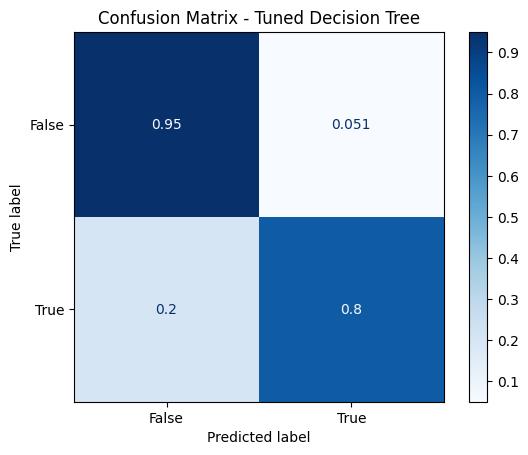

In [ ]:
##confusion matrix,normalised to percentages

confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')
plt.title("Confusion Matrix - Tuned Decision Tree")
plt.show()

**Overall Model Performance.** The overall accuracy of the model remained the same(93%) after tuning.

**Detailed Interpretation of Tuned Metrics**

**Precision:**

For Class 0.0 (No Churn): 0.96. This means that when the model predicts a person will not churn, it is correct 96% of the time.

For Class 1.0 (Churn): 0.73. This means that when the model predicts a customer will churn, it is correct 73% of the time. This is lower than the initial models, but still respectable, implying that a majority of targeted interventions will be on genuine risks.

**Recall**

For Class 0.0 (No Churn): 0.95. The model correctly identifies 95% of all individuals who do not churn.

For Class 1.0 (Churn): 0.80. This means the model correctly identifies 80% of all individuals who actually churn. This is the highest recall and is valuable in a churn scenario, as it significantly minimizes the risk of missing a customer who is about to leave.

**Confusion Matrix Interpretation**

True Negative: This means 95% of individuals who do not churn were correctly predicted as not churning.

False Positive: This means a small number of customers (5% of the Non-Churn group) who do not churn were incorrectly flagged as high-risk (Type I error).

False Negative (Bottom-Left):. This means only 20% of individuals who actually churned were missed by the model. This is the critical metric in this context, and it is significantly lower than in previous runs.

True Positive (Bottom-Right): This means 80% of actual churners were successfully identified.



**Comparing the results of the Decision tree model before and after tuning.**

Precision for Class 0.0: Increased from 0.95 to 0.96.

Precision for Class 1.0: Decreased from 0.81 to 0.73.

Recall for Class 0.0: Decreased from 0.97 to 0.95.

Recall for Class 1.0: Increased from 0.71 to 0.80.

F1-Score for Class 0.0: Remained the same (0.96).

F1-Score for Class 1.0: Remained the same (0.76).

Accuracy: Remained the same (0.93).


**Conslusion:**

 Based on the results for the untuned and tuned classification models, the hyperparameter tuning process was highly successful in aligning the model's priorities with the business goal of customer retention

# **2.  Random Forest**

**Random Forest** is an ensemble learning method that belongs to the bagging (Bootstrap Aggregating) family. It combines the predictions of multiple individual Decision Trees to produce a single, more accurate, and stable prediction.

**How It Works**

Random Forest builds many independent Decision Trees and then aggregates their results to make a final prediction. This process involves two key elements of randomness:

1.	Bootstrap Aggregating (Bagging): Each individual tree in the forest is trained on a different random subset of the training data, sampled with replacement (meaning some data points may be used multiple times, and some not at all).

2.	Feature Randomness: When a tree decides how to split a node, it only considers a random subset of all available features, rather than evaluating every feature. This prevents all trees from selecting the same strong feature at the top nodes, ensuring the trees are diverse and decorrelated.

**Pros**

•	Often provides one of the best out-of-the-box predictive accuracies.

•	The ensemble method and randomness drastically decrease the model's high variance, leading to more generalized results.

•	Naturally captures complex and non-linear relationships.

•	Can easily provide a ranking of which features were most influential in the overall prediction.

**Cons**

•	Training is slower than a single Decision Tree or Logistic Regression because it has to build many trees

•	It is considered as a "black box" model. Interpreting the logic of hundreds of combined trees is far more difficult than interpreting a single Decision Tree.

•	Requires more computational resources and memory to store all the individual trees.


In [ ]:
rf = RandomForestClassifier(class_weight='balanced')## Handling class imbalance
rf.fit(x_train_processed, y_train_processed)

RandomForestClassifier(class_weight='balanced')

In [ ]:
##building and fiiting the pipeline
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier())
])
rf_pipeline.fit(x_train_processed, y_train_processed)

Pipeline(steps=[('scaler', StandardScaler()), ('rf', RandomForestClassifier())])

In [ ]:
##evaluating the model
test_preds = rf.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

       False       0.93      1.00      0.96       455
        True       0.96      0.56      0.70        79

    accuracy                           0.93       534
   macro avg       0.94      0.78      0.83       534
weighted avg       0.93      0.93      0.92       534



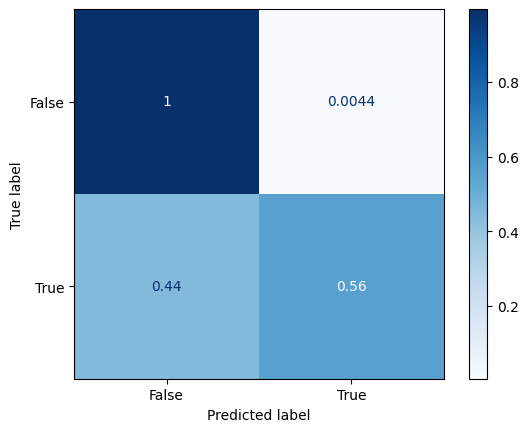

In [ ]:
##confusionmatrix
test_preds = rf.predict(x_test_processed)
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues', normalize='true')

**Overall Model Performance:**

Accuracy (0.93): The overall proportion of correct predictions is very high. This is heavily influenced by the perfect performance on the large "No Churn" class.

**Detailed Interpretation of Classification Report:**

**False (No Churn):**

Recall (1.00): The model correctly identified 100% of all customers who will not churn. This is a perfect performance on the majority class.

Precision (0.93): When the model predicts "No Churn," it's correct 93% of the time.

**True (Churn):**

Precision (0.96): When the model predicts a customer will churn, it is correct 96% of the time. This is an extremely high score, meaning that nearly every customer flagged as high-risk is a genuine churn threat.

Recall (0.56): The model only correctly identified 56% of all customers who actually churned. This means the model missed 44% of the actual churners.

**Key Strength:** The 0.96 Precision for the Churn class means the company can trust that when the model flags a customer, they are almost certainly a real churn risk. This maximizes the efficiency of limited retention resources.

**Key Weakness:.** The Recall of 0.56 means the company is missing almost half (≈44%) of the customers who are going to leave. If the primary business goal is to prevent the absolute maximum number of churners, regardless of resource cost, this model is insufficient.

**In summary**, this model is ideal when resource efficiency is the top priority and the company can only afford to intervene on the highest-confidence churn predictions.


**TUNING THE MODEL**

In [ ]:
from sklearn.model_selection import GridSearchCV

#  GridSearchCV: tries all combinations of given hyperparameters.
# It cross-validates each combo to find the best. Here we focus on 'recall_macro'.

# Param grid for Random Forest
param_grid_rf = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [4, 6, 8, 10, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
     'rf__class_weight': [None, 'balanced']}

# Instantiate GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5,  scoring='recall_macro',
    n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_rf.fit(x_train_processed, y_train_processed)

# Get the best model from the grid search
best_rf = grid_search_rf.best_estimator_

print("Best parameters found: ", grid_search_rf.best_params_)

Best parameters found:  {'rf__class_weight': 'balanced', 'rf__max_depth': 10, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}


In [ ]:
##testing the model
test_preds = best_rf.predict(x_test_processed)
print(classification_report(y_test, test_preds))


              precision    recall  f1-score   support

       False       0.95      0.98      0.96       455
        True       0.85      0.71      0.77        79

    accuracy                           0.94       534
   macro avg       0.90      0.84      0.87       534
weighted avg       0.94      0.94      0.94       534



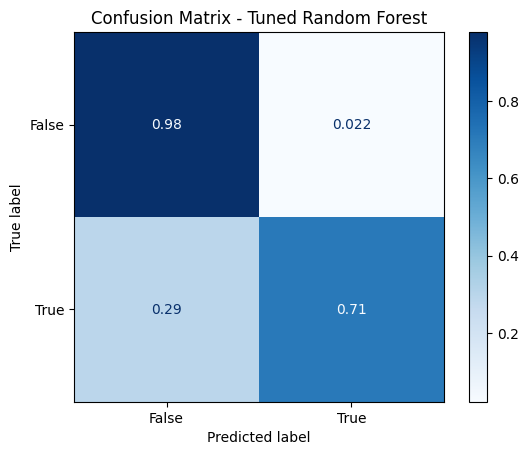

In [ ]:
##confusion matrix,normalised to percentages
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


**Overall Model Performance:** Accuracy (0.94): The overall accuracy of the model increased from (93%) to (94%) after tuning.

**Detailed Interpretation of Tuned Model Results**

**False (No Churn)**

Recall (0.98): The model correctly identified 98% of all customers who were going to stay. This is  a perfect performance on the majority class.

Precision (0.95): When the model predicts "No Churn," it is correct 95% of the time.

**True (Churn):**

Precision (0.85): When the model predicts a customer will churn, it is correct 85% of the time. This is a very high score, ensuring that retention efforts are highly efficient and mostly focused on genuine risks.

Recall (0.71): The model correctly identified 71% of all customers who actually churned. This means the model missed 29% (False Negatives) of the customers who ended up leaving. While not perfect, catching 71% is a strong performance, providing a good capture rate.

**Comparing the results of the Random Forest model before and after tuning.**

Precision for Class 0.0: Increased from 0.93 to 0.95.

Precision for Class 1.0: Decreased from 0.96 to 0.85.

Recall for Class 0.0: Decreased from 1.00 to 0.98.

Recall for Class 1.0: Increased from 0.56 to 0.71.

F1-Score for Class 0.0: Remained the same (0.96).

F1-Score for Class 1.0: Increased from 0.70 to 0.77

Accuracy: Increased from 0.93 to 0.94

**Conclusion.**

Based on the results for the untuned and tuned classification models, the hyperparameter tuning process was successful in aligning the model's priorities with the business goal of customer retention. While a high Accuracy of 0.94 indicates excellent general correctness, the real achievement lies in the Tuned Model's balanced performance on churn, yielding a strong Recall of 0.71 (minimizing missed losses) and a reliable Precision of 0.85 (ensuring resources are used efficiently)



# **3. Logistic Regression**

**Logistic Regression** is a fundamental statistical model used for binary classification (predicting one of two outcomes, like 'True'/'False' or 'Churn'/'No Churn'). Despite its name, it is a classification algorithm, not a regression algorithm. It works by modeling the probability that a given input belongs to the positive class.

**How it works:**

It uses a logistic (sigmoid) function to transform linear combinations of inputs into probabilities between 0 and 1.

If the predicted probability is greater than a chosen threshold (often 0.5), the model predicts class 1; otherwise, class 0.

The model is trained by finding the best-fitting coefficients that maximize the likelihood of the observed data.

**Pros:**

Simple and easy to interpret.

Works well with linearly separable data.

Fast to train and requires less computational power.

Outputs probabilities, not just classes.

**Cons:**

Assumes a linear relationship between predictors and the log-odds.

Not suitable for complex, non-linear problems.

Sensitive to outliers and multicollinearity.

Works best for binary outcomes (extensions are needed for multi-class).


In [ ]:
lr= LogisticRegression(class_weight='balanced')
lr.fit(x_train_processed, y_train_processed)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [ ]:
# Create a pipeline with a scaler and a default Logistic Regression classifier
default_lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Train the default Logistic Regression model
default_lr_pipeline.fit(x_train_processed, y_train_processed)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
##evaluating the model
test_preds = lr.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

       False       0.94      0.73      0.82       455
        True       0.32      0.72      0.44        79

    accuracy                           0.73       534
   macro avg       0.63      0.73      0.63       534
weighted avg       0.85      0.73      0.77       534



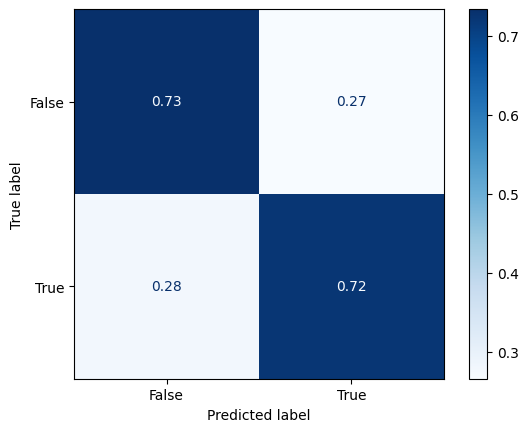

In [ ]:
##confusionmatrix
test_preds = lr.predict(x_test_processed)
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues', normalize='true')

**Overall Model Performance:** Accuracy (0.73): The overall proportion of correct predictions is low, only 73%.

**Detailed Interpretation of Classification Report:**

**False (No Churn):**

Recall (0.73): This means the model correctly identifies 73% of all individuals who do not churn. This is low for the majority class, indicating a high number of customers who were going to stay are being incorrectly flagged as high-risk.

Precision (0.94): When the model predicts a customer will not churn, it is correct 94% of the time.

**True (Churn):**

Precision (0.32): This means that when the model predicts a customer will churn, it is correct only 32% of the time. This is extremely low, indicating that 68% of customers flagged for retention efforts are actually false alarms.

Recall (0.72): This means the model correctly identifies 72% of all individuals who do actually churn. This is a strong recall score, demonstrating the model's success in minimizing missed cases.

**Confusion Matrix Interpretation:**

True Negative (Top-Left): ≈73% of customers who were going to stay were correctly predicted as low risk.

False Positive (Top-Right): ≈27% of customers who were going to stay were incorrectly predicted as having churn (Type I error). This is a massive rate of false alarms.

False Negative (Bottom-Left): ≈28% of customers who were going to churn were incorrectly predicted as low-risk (Type II error). This is low, signifying few missed opportunities.

True Positive (Bottom-Right): ≈72% of customers who were going to churn were correctly predicted as churning. This aligns with the high recall score for the Churn class.


**Key Strengths:**
High Recall for Churn (0.72): The model is very good at identifying most individuals who actually churn, minimizing the risk of missing true positive cases.

**Key Weaknesses:**
Extremely Low Precision for Churn (0.32): The overwhelming weakness is the massive number of false alarms. 68% of the company's intervention resources will be wasted on customers who were never going to leave.

**In Summary:** This model is only suitable when the cost of a False Negative (missing a churner) is overwhelmingly high compared to the cost of a False Positive (wasted intervention). It acts as an aggressive screening tool, casting the widest possible net to catch churners but sacrificing all efficiency.


**TUNING THE MODEL**

In [ ]:
# Create a pipeline with a scaler and a Logistic Regression classifier
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(random_state=42))
])

# Param grid for Logistic Regression
param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l1', 'l2'],
    'lr__solver': ['liblinear', 'saga'],
    'lr__class_weight': [None, 'balanced']
}

# Instantiate GridSearchCV for Logistic Regression
grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring='recall_macro',
                              n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_lr.fit(x_train_processed, y_train_processed)

# Get the best model from the grid search
best_lr = grid_search_lr.best_estimator_

print("Best parameters found: ", grid_search_lr.best_params_)

Best parameters found:  {'lr__C': 0.1, 'lr__class_weight': 'balanced', 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}


In [ ]:
##testing the model
test_preds = best_lr.predict(x_test_processed)
print(classification_report(y_test, test_preds))


              precision    recall  f1-score   support

       False       0.94      0.76      0.84       455
        True       0.35      0.73      0.47        79

    accuracy                           0.76       534
   macro avg       0.65      0.75      0.66       534
weighted avg       0.86      0.76      0.79       534



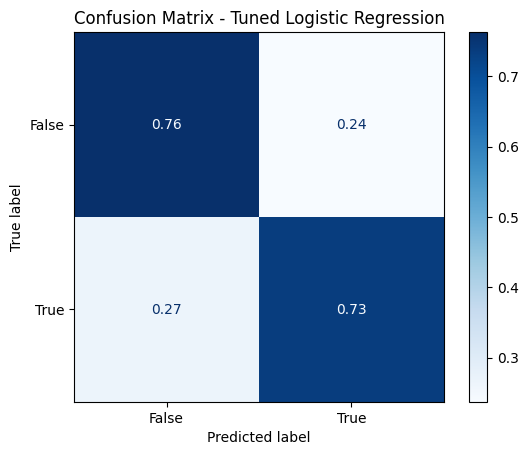

In [ ]:
##confusion matrix,normalised to percentages
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')
plt.title("Confusion Matrix - Tuned Logistic Regression")
plt.show()

**Overall Model Performance:** The accuracy of the model increased from 0.73 to 0.76. the model overall accuracy is still low.

**Detailed Interpretation of Classification Report:**

**True (Churn)**

Recall (0.73): The model correctly identified 73% of all customers who actually churned. This is a strong recall score and the primary success of this model configuration, as it minimizes the costly False Negatives (missed churners).

Precision (0.35): When the model predicts a customer will churn, it is correct only 35% of the time. This is very low, meaning 65% of the customers flagged for retention efforts are actually false alarms (False Positives).

**False (No Churn) :**

Recall (0.76): The model correctly identifies 76% of all customers who will not churn. This is low for the majority class, which directly leads to the high number of false alarms in the Churn class.

Precision (0.94): When the model predicts "No Churn," it's correct 94% of the time.

**Comparing the results of the Logistic Regression model before and after tuning**.

Precision for Class 0.0: Remained the same (0.94).

Precision for Class 1.0: Increased from 0.32 to 0.35.

Recall for Class 0.0: Increased from 0.73 to 0.76.

Recall for Class 1.0: Increased from 0.72 to 0.73.

F1-Score for Class 0.0: Increased from 0.82 to 0.84.

F1-Score for Class 1.0: Increased from 0.44 to 0.47

Accuracy: Increased from 0.73 to 0.76

**Conclusion:**

The hyperparameter tuning process was highly successful in transforming the model's focus, aligning its performance with the critical business goal of customer retention.


**4. XGBoost**

**XGBoost** is an highly efficient and scalable Gradient Boosting framework. It is an ensemble learning method that sequentially builds a series of weak prediction models (typically Decision Trees), with each new tree correcting the errors of the previous ensemble.

**How it works:**

Builds multiple decision trees sequentially, where each new tree focuses on correcting the errors of the previous ones.

Uses gradient boosting, optimizing a loss function to improve accuracy.

Combines all weak learners (trees) into a strong predictive model.

Includes regularization to prevent overfitting.

**Pros**:

High accuracy and strong performance.

Handles both regression and classification problems.

Works well with large and complex datasets.

Has built-in regularization (reduces overfitting).

Can handle missing values automatically.

**Cons:**

More complex to tune than simpler models.

Requires more computational resources.

Can overfit if not properly regularized.

Less interpretable than linear models like logistic regression.


In [ ]:
import xgboost as xgb
# Calculate the scale_pos_weight to handle class imbalance
# It's the ratio of the number of negative class samples to the number of positive class samples
neg_count = np.sum(y_train == 0)
pos_count = np.sum(y_train == 1)
scale_pos_weight = neg_count / pos_count

# Create a pipeline with StandardScaler and XGBClassifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_classifier', xgb.XGBClassifier(objective='binary:logistic',
                                         eval_metric='logloss', # or 'auc', 'error', etc.
                                         use_label_encoder=False, # Suppress the warning
                                         random_state=42,
                                         scale_pos_weight=scale_pos_weight)) # Handle imbalance
])

# Fit the pipeline to the training data
pipeline_xgb.fit(x_train_processed, y_train_processed)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:24:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb_classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# Predict on the test data
y_pred_xgb = pipeline_xgb.predict(x_test_processed)
##printing the classification report
print(classification_report(y_test_processed, y_pred_xgb))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97       455
        True       0.90      0.77      0.83        79

    accuracy                           0.95       534
   macro avg       0.93      0.88      0.90       534
weighted avg       0.95      0.95      0.95       534



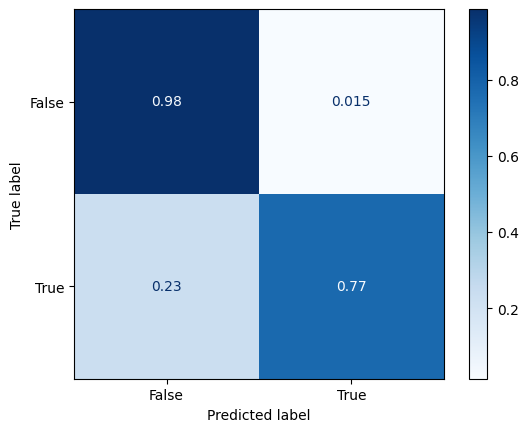

In [ ]:
# Display the confusion matrix for the XGBoost model
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, cmap='Blues', normalize='true')
plt.show()

**Overall Model Performance:** Accuracy (0.95): The model correctly predicted the outcome for 95% of all customers in the test set. This indicates excellent overall performance.

**Detailed Interpretation of Classification Report**

**True (Churn):**

Precision (0.90): When the model predicts a customer will churn, it is correct 90% of the time. This is exceptionally high, making the model's high-risk flags highly reliable and efficient for targeted retention efforts.

Recall (0.77): The model correctly identified 77% of all customers who actually churned. This is a strong capture rate, meaning the company successfully identifies the vast majority of customers who are about to leave.

F1-Score (0.83): This high F1-score confirms that the model has achieved a near-optimal balance between reliability (Precision) and coverage (Recall) for the critical minority class.

**False (No Churn) :**

Recall (0.98): The model correctly identified 98% of all customers who were going to stay, demonstrating excellent performance on the majority class.

Precision (0.96): When the model predicts "No Churn," it's correct 96% of the time.


F1-Score (0.97): This a very high F1-score confirms that the model has achieved an optimal balance between reliability (Precision) and coverage (Recall) for the critical minority class.

**TUNING THE MODE**L

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Calculate the scale_pos_weight to handle class imbalance
neg_count = np.sum(y_train_processed == 0)
pos_count = np.sum(y_train_processed == 1)
scale_pos_weight = neg_count / pos_count

# Create a pipeline with StandardScaler and XGBClassifier
pipeline_xgb = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb_classifier', xgb.XGBClassifier(objective='binary:logistic',
                                         eval_metric='logloss',
                                         use_label_encoder=False,
                                         random_state=42,
                                         scale_pos_weight=scale_pos_weight))
])

# Param grid for XGBoost
param_grid_xgb = {
    'xgb_classifier__n_estimators': [100, 200, 300],
    'xgb_classifier__max_depth': [3, 5, 7],
    'xgb_classifier__learning_rate': [0.01, 0.1, 0.2],
    'xgb_classifier__subsample': [0.7, 0.8, 0.9],
    'xgb_classifier__colsample_bytree': [0.7, 0.8, 0.9]
}

# Instantiate GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid_xgb, cv=5, scoring='recall_macro',
                               n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search_xgb.fit(x_train_processed, y_train_processed)

# Get the best model from the grid search
best_xgb = grid_search_xgb.best_estimator_

print("Best parameters found: ", grid_search_xgb.best_params_)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [10:31:31] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters found:  {'xgb_classifier__colsample_bytree': 0.9, 'xgb_classifier__learning_rate': 0.1, 'xgb_classifier__max_depth': 7, 'xgb_classifier__n_estimators': 200, 'xgb_classifier__subsample': 0.8}


In [ ]:
##testing the model
test_preds = best_xgb.predict(x_test_processed)
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

       False       0.97      0.99      0.98       455
        True       0.93      0.82      0.87        79

    accuracy                           0.96       534
   macro avg       0.95      0.91      0.93       534
weighted avg       0.96      0.96      0.96       534



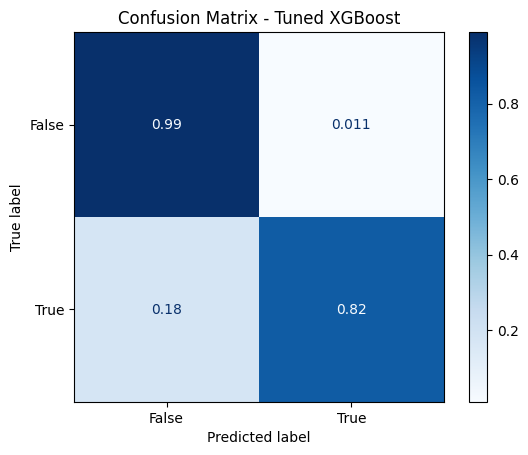

In [ ]:
##confusion matrix,normalised to percentages
confusion_matrix(y_test, test_preds)
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues',normalize='true')
plt.title("Confusion Matrix - Tuned XGBoost")
plt.show()

**Detailed Interpretation of Results After Tuning**

**Overall Model Performance:** The Accuracy of 0.96 signifies the model correctly predicts the outcome for 96% of all customers, setting a new benchmark for overall correctness. The high F1-score of 0.87 for the minority class confirms this high accuracy is not misleading. It confirms that the gains made on the minority class were achieved without sacrificing the model's fundamental ability to correctly distinguish between secure and insecure customers.

**True (Churn) Interpretation:**
Precision (0.93): This means that when the model predicts a customer will churn, it is correct 93% of the time. This is extremely high, indicating minimal wasted resources on false alarms.

Recall (0.82): The model correctly identified 82% of all customers who actually churned. This is the highest capture rate achieved across all models, ensuring the vast majority of at-risk customers are flagged.

F1-Score (0.87): This exceptionally high F1-score represents a near-perfect balance between reliability and coverage for the minority class.

**False (No Churn):**

The performance on the False (No Churn) class is nearly perfect, which strongly validates the model's overall reliability:

Recall (0.99): The model correctly identified 99% of all customers who were actually going to stay. This translates directly to a minimal False Positive rate, meaning the model almost never mistakenly flags a customer who would have stayed anyway. This prevents retention resources from being wasted on the majority of the low-risk customer base.

Precision (0.97): This means that when the model predicts a customer will not churn, it is correct 97% of the time. This provides high confidence to the business that any customer not flagged for intervention is highly likely to be secure.

The F1-score of 0.98 for the False (No Churn) class is exceptionally high, which is expected given its near-perfect Precision (0.97) and Recall (0.99): This high F1-score confirms that the model is extremely robust and reliable on the majority of the customer base. It essentially guarantees that the vast majority of non-churning customers are correctly identified, which strengthens the overall Accuracy of 0.96 and ensures high confidence in the model's predictions for the secure customer population.

**Comparing the results of the XGBoost model before and after tuning.**

Precision for Class 0.0: Increased from 0.96 to 0.97.

Precision for Class 1.0: Increased from 0.90 to 0.93.

Recall for Class 0.0: Increased from 0.98 to 0.99.

Recall for Class 1.0: Increased from 0.77 to 0.82.

F1-Score for Class 0.0: Increased from 0.97 to 0.98.

F1-Score for Class 1.0: Increased from 0.83 to 0.87

Accuracy: Increased from 0.95 to 0.96

**Key Strength and Weakness**

**Key Strength**

**Balance and Reliability:** Exceptional F1-Score (0.87) and Precision (0.93) for minority class: The model is highly reliable. It offers the best blend of identifying churners while providing immense confidence in its positive predictions.

**Key Weakness**
Missed Churners: While high, the Recall of 0.82 still means 18% of actual churners are missed. This remains the area for marginal improvement, although it is likely the practical limit for this dataset.

**General Conclusion on the Model.**

This model represents the optimal predictive solution for the customer churn dataset. Through effective hyperparameter tuning, the model has achieved a phenomenal Accuracy of 96% and, more importantly, struck the best balance to maximize business utility. Its high Recall of 0.82 ensures that the majority of potential financial loss is mitigated, while its outstanding Precision of 0.93 guarantees that intervention resources are allocated with maximum efficiency. This model is reliable, highly accurate, and robustly optimized for minimizing both types of critical business errors.


# **NOTE:**

XGBoost for both before and after tuning performed better than other Algorithms/ models used (Decision Tree, Random Forest, and Logistic Regression).